In [25]:
%matplotlib inline
from IPython import display
import glob
from utils_demo import *

import os
import sys
sys.path.append(os.path.abspath('../simulation'))

from PIL import Image
import matplotlib.pyplot as plt

from tqdm import tqdm

from unity_simulator.comm_unity import UnityCommunication
from unity_simulator import utils_viz

## Customize Environment
```
try to change the room numbers of environment 4. The next codes I tried to keep living room and remove other rooms.
```

In [26]:
import json

# Reset the environment and retrieve the initial graph structure
comm.reset(4)
s, graph = comm.environment_graph()

# Find Floor, Walls, Ceiling, Doors, Lamps, Decor IDs
items_ids = [node["id"] for node in graph['nodes'] if node["category"] in ["Walls", "Ceiling", "Doors", "Lamps"]]

# Find edges attached to the living room.
living_room_id = 11
edges_attached_livingroom_id = [
    edge["from_id"] for edge in graph['edges'] if int(edge["to_id"]) == living_room_id and edge["from_id"] in items_ids
]
edges_attached_livingroom = [
    edge for edge in graph['edges'] if int(edge["to_id"]) == living_room_id and edge["from_id"] in items_ids
]

edges_attached_livingroom_id.append(living_room_id)

# Construct a subgraph based on nodes and edges connected to the living room, excluding furniture
my_graph = {
    "nodes": [node for node in graph['nodes'] if int(node["id"]) in edges_attached_livingroom_id],
    "edges": edges_attached_livingroom
}

print("Number of nodes in subgraph:", len(my_graph['nodes']))
print("Number of edges in subgraph:", len(my_graph['edges']))

# Expand the scene with the constructed subgraph
success, message = comm.expand_scene(my_graph)
print("Expand scene success:", success)

# Retrieve and print the updated graph
s, new_graph = comm.environment_graph()
print("Number of nodes in updated graph:", len(new_graph['nodes']))
print("Number of edges in updated graph:", len(new_graph['edges']))

# Print the updated graph in a formatted JSON string
# print(json.dumps(new_graph, indent=4))



Number of nodes in subgraph: 15
Number of edges in subgraph: 14
Expand scene success: True
Number of nodes in updated graph: 310
Number of edges in updated graph: 192


In [27]:
comm.add_character('chars/Female2', initial_room='livingroom')

True

81


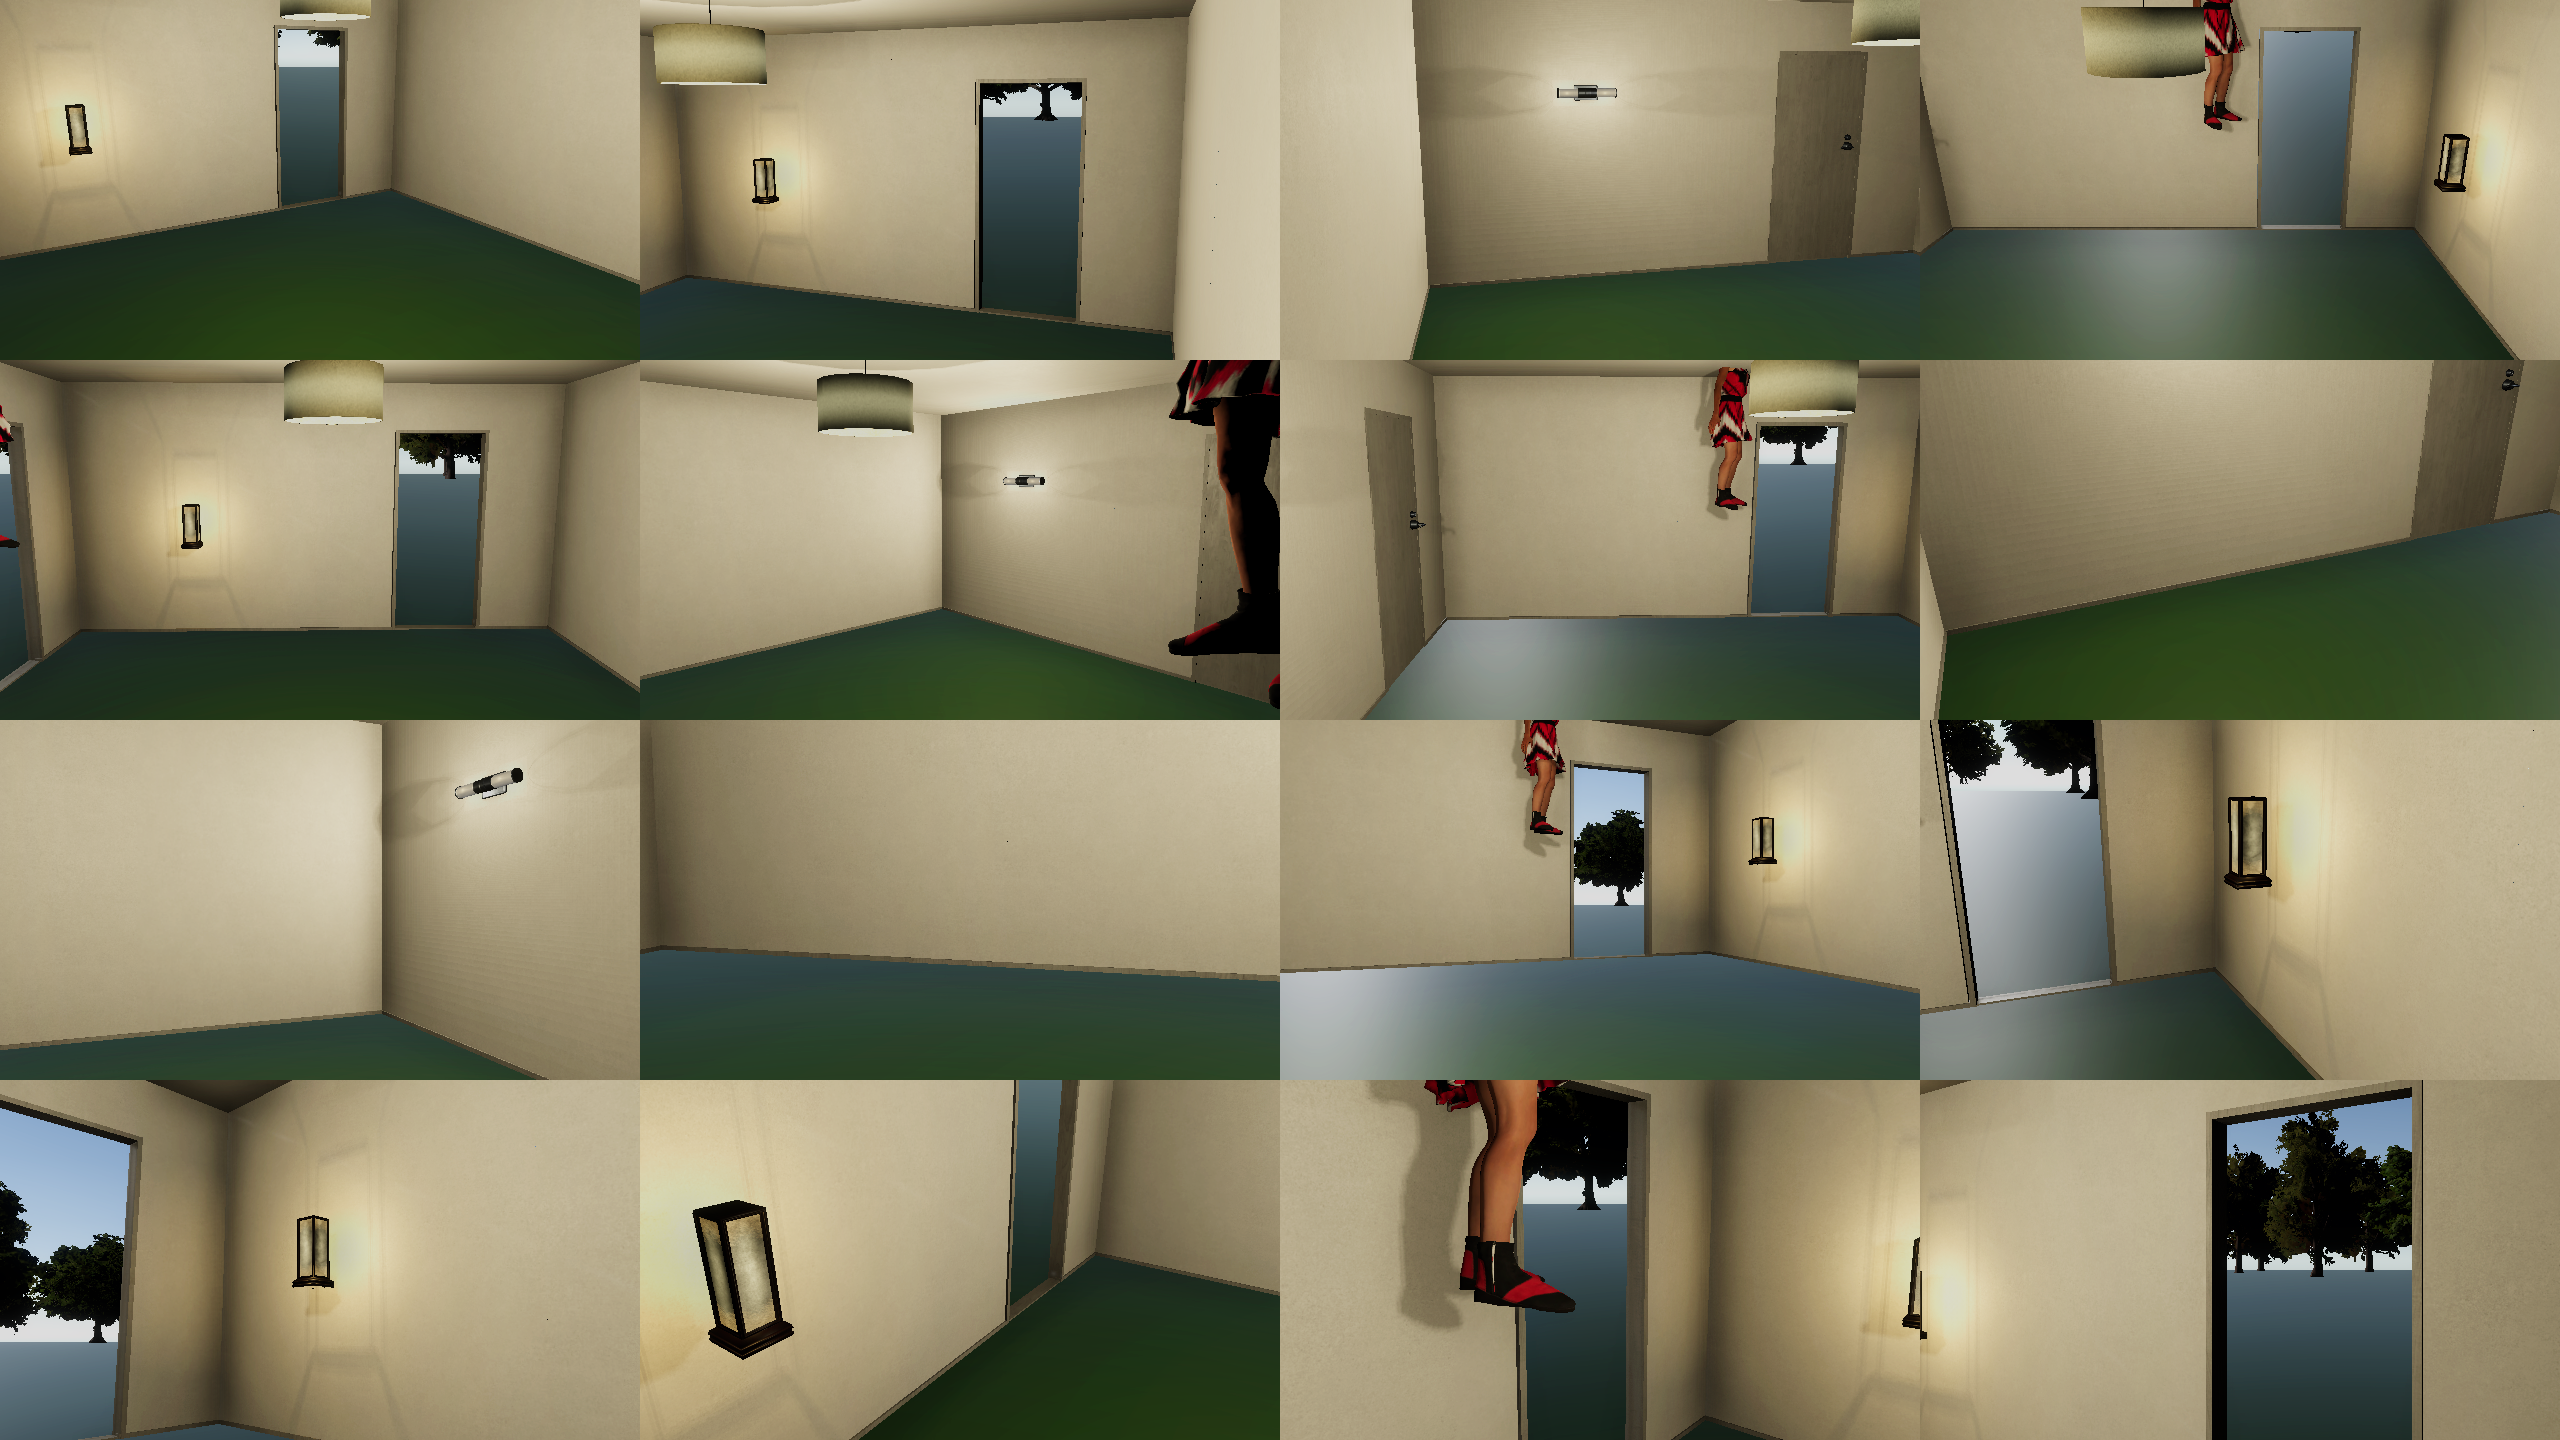

In [29]:
s, c = comm.camera_count()
print(c)
views = []
for i in range(16):
    view = get_scene_cameras(comm, [i])
    views += view
display.display(display_grid_img(views, nrows=4))
   